# Homework 6

TFCB 2022

Due date: Nov 17, 2022 1PM

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [1]:
oldw <- getOption("warn")
options(warn = -1) # suppress warning message

library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!` means NOT; allows one to perform a not check, negating result
https://itsalocke.com/blog/learn-to-r-blog-series---operators-and-objects/#:~:text=The%20exclamation%20point%20(%20!%20),that%20check%20not%20true%3F%E2%80%9D. 

2. `is.na` returns "TRUE" for NA/missing values in a vector
https://www.statmethods.net/input/missingdata.html#:~:text=In%20R%2C%20missing%20values%20are,for%20character%20and%20numeric%20data. 

3. `is.numeric` returns TRUE for numeric values in a vector
https://r-lang.com/as-numeric-r/

4. `anti_join` will return all values in x that are not matched in y
https://dplyr.tidyverse.org/reference/filter-joins.html 

5. `desc` sort in descending order
https://dplyr.tidyverse.org/reference/desc.html 

6. `dplyr::slice` index rows by integer location, with helper functions 
https://dplyr.tidyverse.org/reference/slice.html 

7. `dplyr::across` apply a function or transformation across columns
https://itsalocke.com/blog/learn-to-r-blog-series---operators-and-objects/#:~:text=The%20exclamation%20point%20(%20!%20),that%20check%20not%20true%3F%E2%80%9D.  


## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [149]:
# read in annotations in tsv format, pipe
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/locus_groups/protein-coding_gene.txt") %>%
  # select certain columns of interest, pipe
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%
  # keep rows that do not contain NA in the ccds_id col, pipe
  filter(!is.na(ccds_id)) %>%
  # print the filtered columns 
  print()

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 19229 Columns: 54
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (39): hgnc_id, symbol, name, locus_group, locus_type, status, location,...
dbl   (3): entrez_id, homeodb, orphanet
lgl   (8): mirbase, snornabase, imgt, kznf_gene_catalog, mamit-trnadb, lncrn...
date  (4): date_approved_reserved, date_symbol_changed, date_name_changed, d...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 18,785 × 5
   ensembl_gene_id symbol  name                               gene_group ccds_id
   <chr>           <chr>   <chr>                              <chr>      <chr>  
 1 ENSG00000121410 A1BG    alpha-1-B glycoprotein             Immunoglo… CCDS12…
 2 ENSG00000148584 A1CF    APOBEC1 complementation factor     RNA bindi… CCDS72…
 3 ENSG00000175899 A2M     alpha-2-macroglobulin              Alpha-2-m… CCDS44…
 4 ENSG00000166535 A2ML1   alpha-2-macroglobulin like 1       Alpha-2-m… CCDS85…
 5 ENSG00000184389 A3GALT2 alpha 1,3-galactosyltransferase 2  Glycosylt… CCDS60…
 6 ENSG00000128274 A4GALT  alpha 1,4-galactosyltransferase (… Alpha 1,4… CCDS14…
 7 ENSG00000118017 A4GNT   alpha-1,4-N-acetylglucosaminyltra… Alpha 1,4… CCDS30…
 8 ENSG00000094914 AAAS    aladin WD repeat nucleoporin       WD repeat… CCDS53…
 9 ENSG00000081760 AACS    acetoacetyl-CoA synthetase         Acyl-CoA … CCDS92…
10 ENSG00000114771 AADAC   arylacetamide deacetylase          Lipases|A… CCDS33…
# … w

In [57]:
# read in the data (tsv), pipe 
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
  # change the ENSEMBL gene column name, pipe
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
  # print results
  print()

Rows: 63677 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 63,677 × 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# … with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <db

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 43031 rows containing non-finite values (stat_sum).”


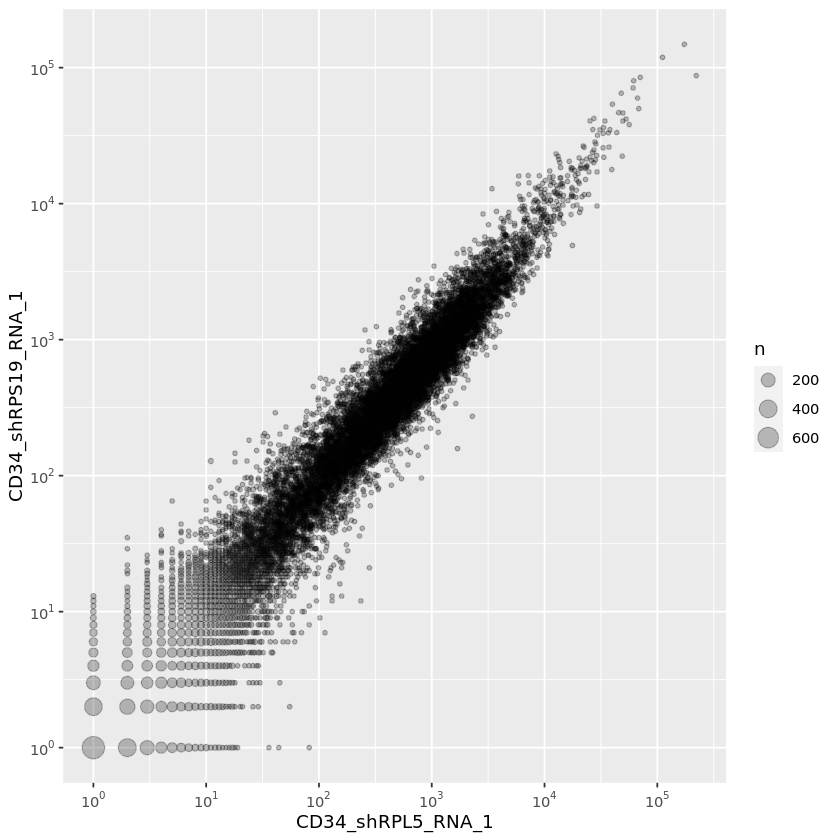

In [155]:
data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  geom_count(alpha = 0.25) +
  scale_y_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
   labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
   labels = scales::trans_format("log10", scales::math_format(10^.x))) 



**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [156]:
data1 <- data %>% select(ensembl_gene_id, matches("RPL5"), matches("RPS19"), matches("Luc")) %>% print()


# A tibble: 63,677 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                40                49                 6
 2 ENSG00000000005                 0                 0                 0
 3 ENSG00000000419              1116              1000               101
 4 ENSG00000000457               149               126                14
 5 ENSG00000000460               289               268                52
 6 ENSG00000000938               204               145                17
 7 ENSG00000000971               241               203                45
 8 ENSG00000001036              1487               936               182
 9 ENSG00000001084              1036              1224               134
10 ENSG00000001167               498               557                75
# … with 63,667 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <db

## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [158]:
data2<- data1 %>% filter(across(where(is.numeric), ~ . >=50)) %>% print()


Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”


# A tibble: 4,239 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000419              1116              1000               101
 2 ENSG00000001036              1487               936               182
 3 ENSG00000001084              1036              1224               134
 4 ENSG00000001497              1436              1231               253
 5 ENSG00000002549              1228              1186               285
 6 ENSG00000002586              2746              1600               260
 7 ENSG00000002834              4346              3800               254
 8 ENSG00000003056              1379              1661               321
 9 ENSG00000003393               832               690                84
10 ENSG00000003402              1836              1382                95
# … with 4,229 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <dbl>

## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [159]:
data3<- data2 %>% mutate_if(is.numeric, funs(./median(.))) 

ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,0.8169839,0.8319468,0.6196319,0.8956835,0.6748047,0.5968170,1.0495050,0.8471338,0.7692308,0.8198504,0.8661417,0.8571429
ENSG00000001036,1.0885798,0.7787022,1.1165644,1.0611511,0.7812500,0.6648983,0.7326733,0.8662420,0.6818521,0.5805574,0.7440945,1.0892857
ENSG00000001084,0.7584187,1.0183028,0.8220859,0.9892086,0.5449219,0.7223696,0.8366337,0.6050955,1.1045556,1.1257648,0.8661417,1.0357143
ENSG00000001497,1.0512445,1.0241265,1.5521472,1.3201439,0.8642578,0.8983201,0.9653465,0.8726115,1.2300224,1.4398368,2.3385827,2.3333333
ENSG00000002549,0.8989751,0.9866889,1.7484663,1.6079137,0.6767578,0.7931034,1.2871287,1.4585987,1.1478715,1.1339225,1.8070866,1.6190476
ENSG00000002586,2.0102489,1.3311148,1.5950920,1.4208633,2.5097656,1.7586207,1.8762376,1.6433121,0.6116505,0.5513256,0.6535433,0.6666667


## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [161]:
lfc <- data3 %>%
  mutate(mean_rpl5_te = (CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) /
                            (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2)) %>%
  mutate(mean_rps19_te = (CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) /
                            (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2)) %>%
  mutate(mean_shluc_te = (CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) /
                            (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2)) %>%
  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>%
  mutate(lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te),
         lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te)) %>%
  print()



# A tibble: 4,239 × 6
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te lfc_te_rpl5
   <chr>                  <dbl>         <dbl>         <dbl>       <dbl>
 1 ENSG00000000419        0.919         1.49          1.08       -0.239
 2 ENSG00000001036        1.17          1.11          1.45       -0.316
 3 ENSG00000001084        1.02          1.14          0.853       0.258
 4 ENSG00000001497        1.38          1.04          1.75       -0.338
 5 ENSG00000002549        1.78          1.87          1.50        0.245
 6 ENSG00000002586        0.903         0.825         1.14       -0.331
 7 ENSG00000002834        0.479         0.394         0.519      -0.115
 8 ENSG00000003056        1.87          1.87          1.02        0.882
 9 ENSG00000003393        0.831         1.20          0.462       0.847
10 ENSG00000003402        0.505         0.427         0.344       0.552
# … with 4,229 more rows, and 1 more variable: lfc_te_rps19 <dbl>


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [162]:
#lfc %>% mutate(avg_lfc = mean(across(starts_with("lfc")))) #%>% select(ensembl_gene_id, avg_lfc)
#lfc %>% mutate(avg_lfc = rowMeans(starts_with("lfc")))
#lfc %>% rowwise() %>% mutate(avg_lfc = mean(c(lfc_te_rpl5, lfc_te_rpl5)))
mean_lfc <- lfc %>% rowwise() %>% mutate(avg_lfc = mean(c_across(starts_with("lfc")))) %>% select(ensembl_gene_id, avg_lfc)


## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [164]:

mean_lfc2<- inner_join(mean_lfc, annotations, by = "ensembl_gene_id" )



## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

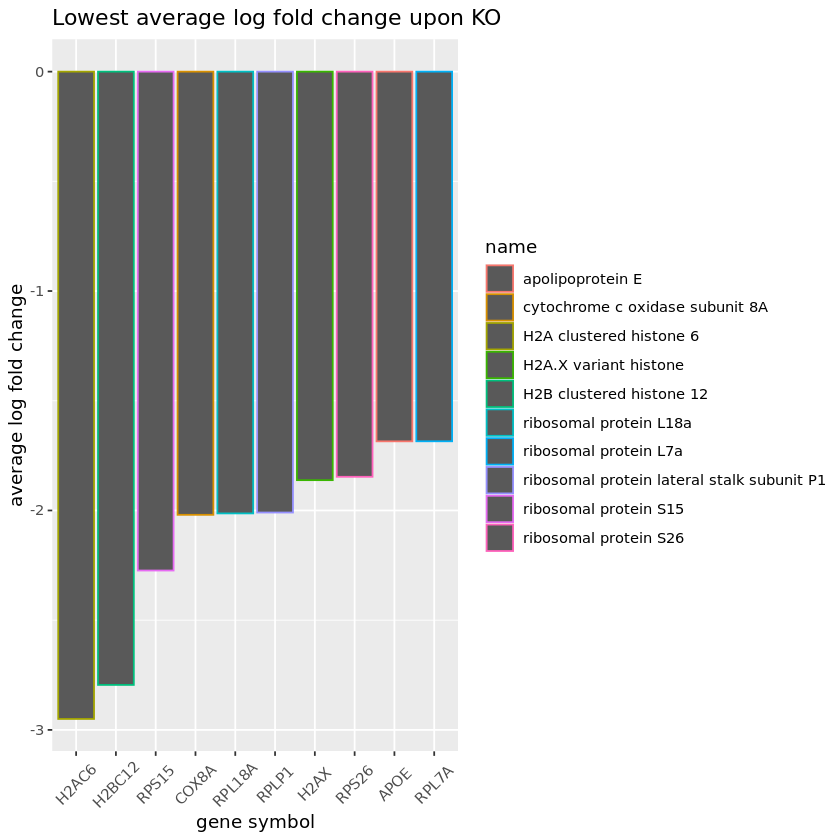

In [169]:
mean_lfc3<- mean_lfc2 %>% arrange(avg_lfc) %>% head(10) %>% select(symbol, name, avg_lfc)

mean_lfc3 %>%  ggplot(aes(x = fct_reorder(symbol, avg_lfc), y = avg_lfc, color = name)) +
  geom_col() +
    theme(axis.text.x = element_text(angle = 45, vjust = .5)) +
    ggtitle("Lowest average log fold change upon KO") +
    xlab("gene symbol") +
    ylab("average log fold change")

# For plotting, I reordered the x variable to plot in order of average lfc, and used barplots to represent the avg_lfc. 
# I changed the angle and position of the x axis text, and added more descriptive titles/labels. 

options(warn = oldw) ## turning warnings back on